In [ ]:
#LINKS AND INFORMATION ON THE DATASET USED:
# The dataset, obtained from Kaggle.com, includes 16,928 entries with details on game titles, platforms, sales
# figures (regional and global), and ratings. It covers a broad temporal and geographic scope, providing a
# solid foundation for comprehensive industry analysis.
#DATASET LINK:
# https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings?resource=download&select=Video_Games.csv

In [ ]:
#Step 1: Load the Data and creating its dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('Video_Games.csv')

video_games_df=pd.DataFrame(df)


In [ ]:
video_games_df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,9487,Cabela's Alaskan Adventure,X360,2006.0,Sports,Activision,0.12,0.00,0.00,0.01,0.13,48.0,11.0,5.6,17.0,FUN Labs,T
9488,9488,RealSports Volleyball,2600,1981.0,Sports,Atari,0.12,0.01,0.00,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN
9489,9489,Heroes of the Pacific,XB,2005.0,Simulation,Codemasters,0.10,0.03,0.00,0.00,0.13,76.0,33.0,8.2,5.0,IR Gurus Interactive Ltd.,T
9490,9490,RollerCoaster Tycoon,XB,2003.0,Strategy,Atari,0.10,0.03,0.00,0.00,0.13,62.0,8.0,8.3,12.0,Atari,E


In [ ]:
#We have to check missing values in the dataframe for a better analysis:

print(df.isnull().sum())


index                 0
Name                  1
Platform              0
Year_of_Release     147
Genre                 1
Publisher            28
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           1
Global_Sales          1
Critic_Score       4024
Critic_Count       4024
User_Score         3138
User_Count         4138
Developer          3122
Rating             3156
dtype: int64


In [ ]:
#Approach 1: FILLING MISSING VALUES BASED ON GENRE,PLATFORM,AND YEAR
#Problems with approach 1: There are almost half of values of (Critic_Score,Critic_Count,User_Score,User_Count) missing so filling up them with
#their respective means or medians would be biased

#Approach 2:DROPPING OUT THE MISSING VALUES,MAKING AN ML MODEL BASED ON REMAINING VALUES THEN,PREDICTING MISSING VALUES USING ML MODEL
#Advantages: In this approach, the major advantage is remaining unbiased , as we wont be filling the values with the means or medians that could possibly destruct our model
# Also we will have an advantage of getting a training data and tesing data from the dataset where we could test our model

In [ ]:


# Columns of interest for missing values
columns_of_interest = ['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']

# Create a mask for rows with any NaN values in the columns of interest
mask = df[columns_of_interest].isna().any(axis=1)

# Separating the dataset into training and testing based on the mask
train_games_df = df[~mask]  # Training data: rows without NaN values in the columns of interest
test_games_df = df[mask]    # Testing data: rows with at least one NaN value in the columns of interest



In [ ]:
video_games_train_df=pd.DataFrame(train_games_df)

video_games_train_df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9485,9485,Persona 4: Arena,X360,2012.0,Fighting,Atlus,0.08,0.01,0.03,0.01,0.13,83.0,21.0,7.3,60.0,Arc System Works,T
9486,9486,Street Fighter IV,PC,NaN,Fighting,Capcom,0.07,0.05,0.00,0.02,0.13,91.0,23.0,8,352.0,Capcom,T
9487,9487,Cabela's Alaskan Adventure,X360,2006.0,Sports,Activision,0.12,0.00,0.00,0.01,0.13,48.0,11.0,5.6,17.0,FUN Labs,T
9489,9489,Heroes of the Pacific,XB,2005.0,Simulation,Codemasters,0.10,0.03,0.00,0.00,0.13,76.0,33.0,8.2,5.0,IR Gurus Interactive Ltd.,T


In [ ]:
video_games_test_df=pd.DataFrame(test_games_df)

video_games_test_df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,Rally Fusion: Race of Champions,PS2,2002.0,Racing,Activision,0.06,0.05,0.00,0.02,0.13,73.0,19.0,tbd,NaN,Climax Group,E
9483,9483,The House of the Dead,SAT,1997.0,Shooter,Sega,0.00,0.00,0.13,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN
9484,9484,Transformers: Prime,WiiU,2012.0,Action,Activision,0.09,0.03,0.00,0.01,0.13,NaN,NaN,NaN,NaN,NaN,NaN
9488,9488,RealSports Volleyball,2600,1981.0,Sports,Atari,0.12,0.01,0.00,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the shapes of the datasets
print(f'Training Data Shape: {train_games_df.shape}')
print(f'Testing Data Shape: {test_games_df.shape}')


Training Data Shape: (5011, 17)
Testing Data Shape: (4481, 17)


In [ ]:
#EXPLORATORY DATA ANALYSIS ON TRAINING DATA:

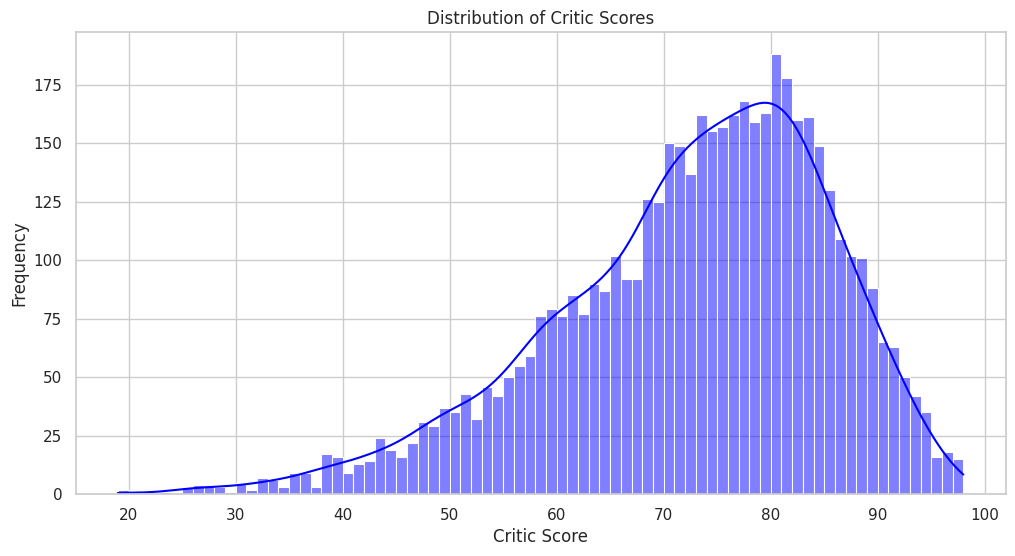

<ipython-input-13-bf18468aa92e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['User_Score'] = pd.to_numeric(train_games_df['User_Score'], errors='coerce')


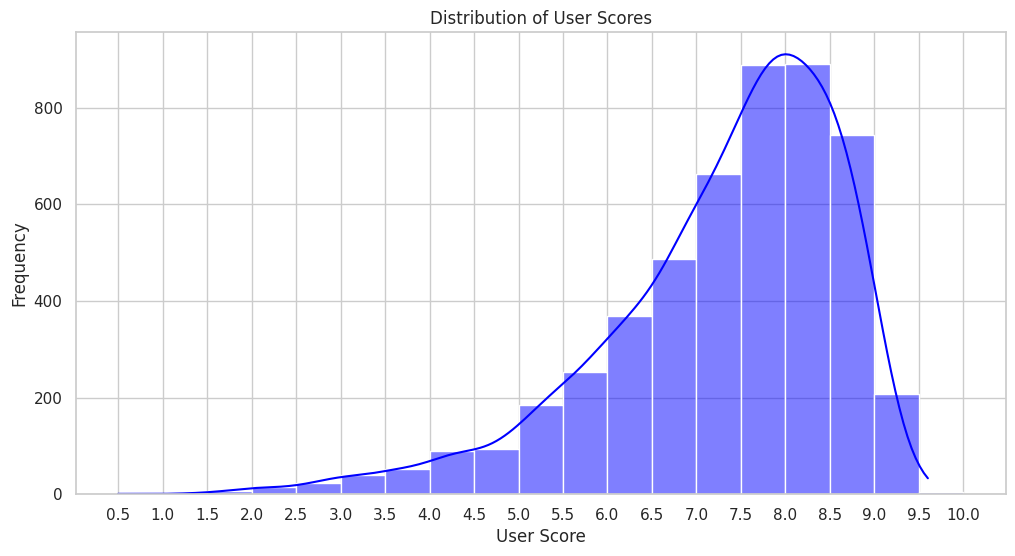

In [ ]:
#1. Histograms of Critic and User Scores


sns.set(style="whitegrid")

# Plotting histogram for Critic Scores
plt.figure(figsize=(12, 6))
sns.histplot(train_games_df['Critic_Score'].dropna(), kde=True, color='blue', binwidth=1)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()


# Convert 'User_Score' to numeric, coercing errors
train_games_df['User_Score'] = pd.to_numeric(train_games_df['User_Score'], errors='coerce')

# Now that 'User_Score' is numeric, we can calculate bins
bin_width = 0.5  # Define the bin width you prefer
bins = np.arange(train_games_df['User_Score'].min(), train_games_df['User_Score'].max() + bin_width, bin_width)

# Plotting histogram for User Scores
plt.figure(figsize=(12, 6))
sns.histplot(train_games_df['User_Score'].dropna(), bins=bins, kde=True, color='blue')
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.xticks(bins)  # Setting x-axis ticks to match the bins
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

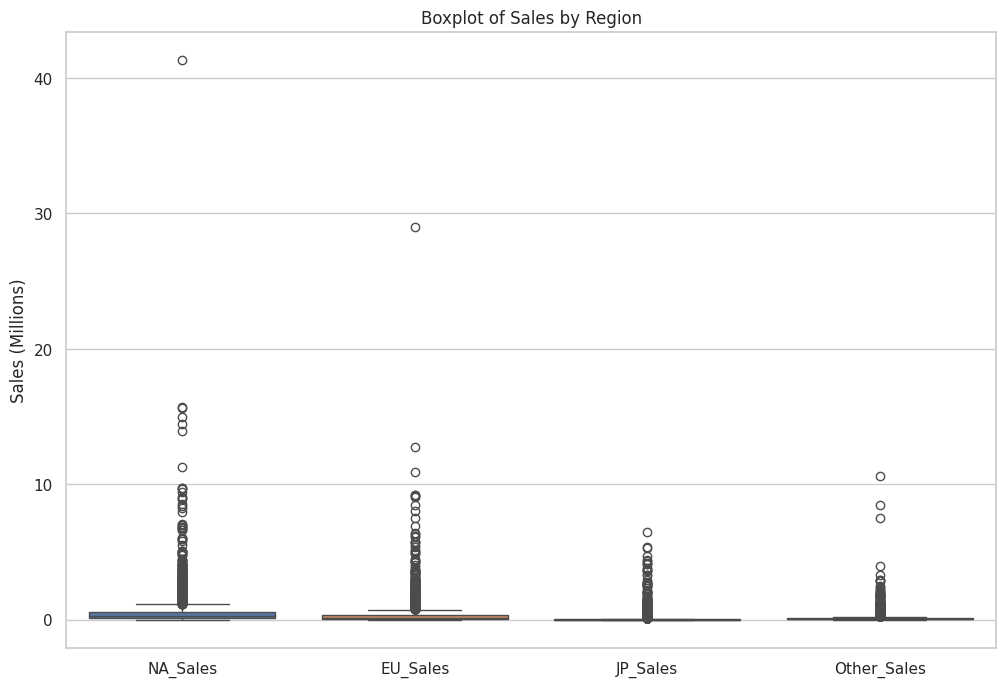

<ipython-input-14-66597d84a009>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['log_NA_Sales'] = np.log(train_games_df['NA_Sales'] + 0.01)
<ipython-input-14-66597d84a009>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['log_EU_Sales'] = np.log(train_games_df['EU_Sales'] + 0.01)
<ipython-input-14-66597d84a009>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

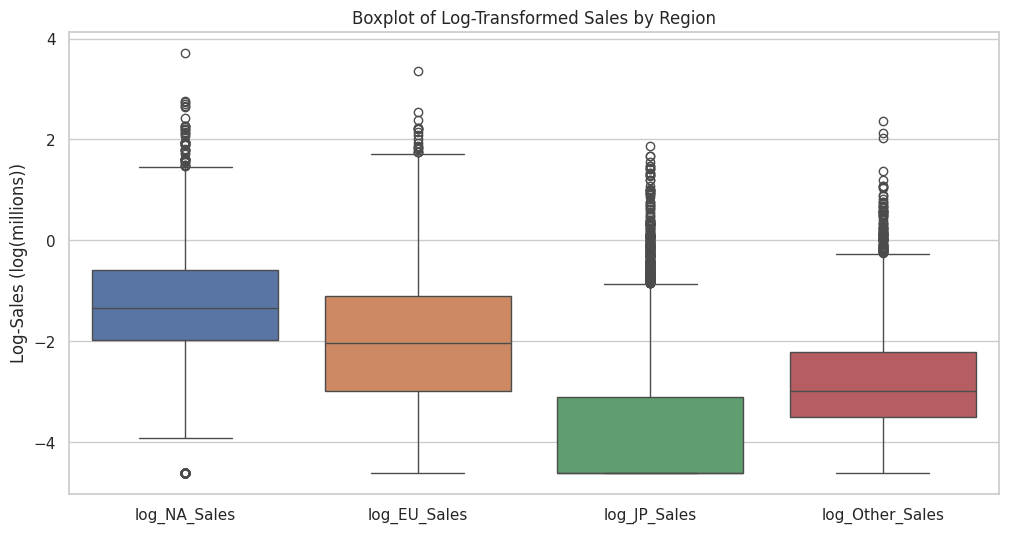

In [ ]:
#2. Boxplots of Sales by Region
# Creating a list of columns for regional sales
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Plotting boxplots for sales by region
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_games_df[sales_columns])
plt.title('Boxplot of Sales by Region')
plt.ylabel('Sales (Millions)')
plt.show()

#Sales data span several orders of magnitude, applying a log transformation can help display the data on a more comprehensible scale.


# Apply log transformation; adding a small constant to avoid log(0)
train_games_df['log_NA_Sales'] = np.log(train_games_df['NA_Sales'] + 0.01)
train_games_df['log_EU_Sales'] = np.log(train_games_df['EU_Sales'] + 0.01)
train_games_df['log_JP_Sales'] = np.log(train_games_df['JP_Sales'] + 0.01)
train_games_df['log_Other_Sales'] = np.log(train_games_df['Other_Sales'] + 0.01)

# Plotting log-transformed sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_games_df[['log_NA_Sales', 'log_EU_Sales', 'log_JP_Sales', 'log_Other_Sales']])
plt.title('Boxplot of Log-Transformed Sales by Region')
plt.ylabel('Log-Sales (log(millions))')
plt.show()



<ipython-input-15-49cb426f672f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales', data=train_games_df, estimator=sum, ci=None)


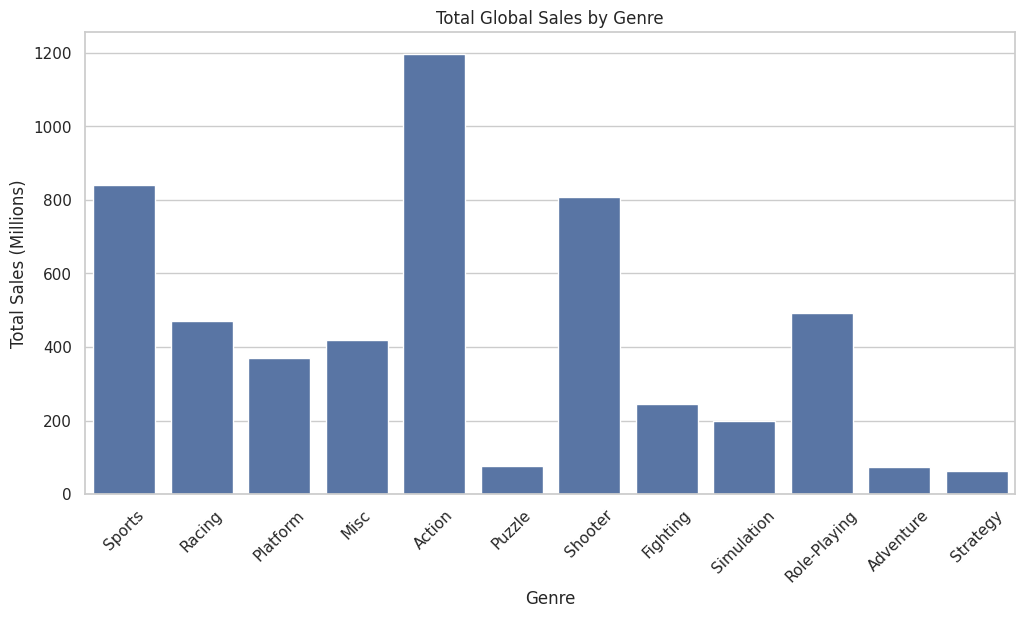

In [ ]:
#3. Bar Plots of Average Global Sales by Genre
# Bar plot of average global sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', data=train_games_df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.show()


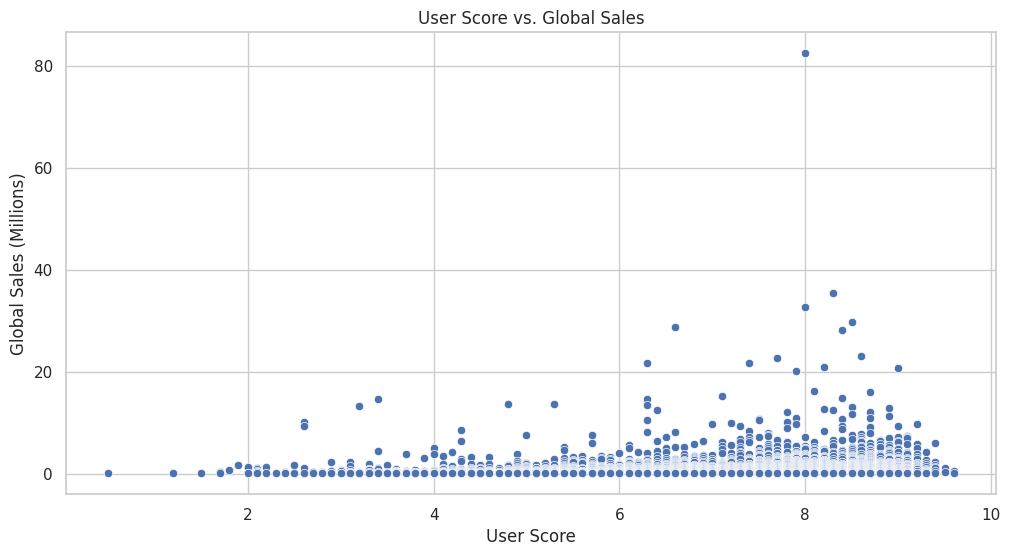

<ipython-input-16-a03302b4bef5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['log_Global_Sales'] = np.log(train_games_df['Global_Sales'] + 0.01)


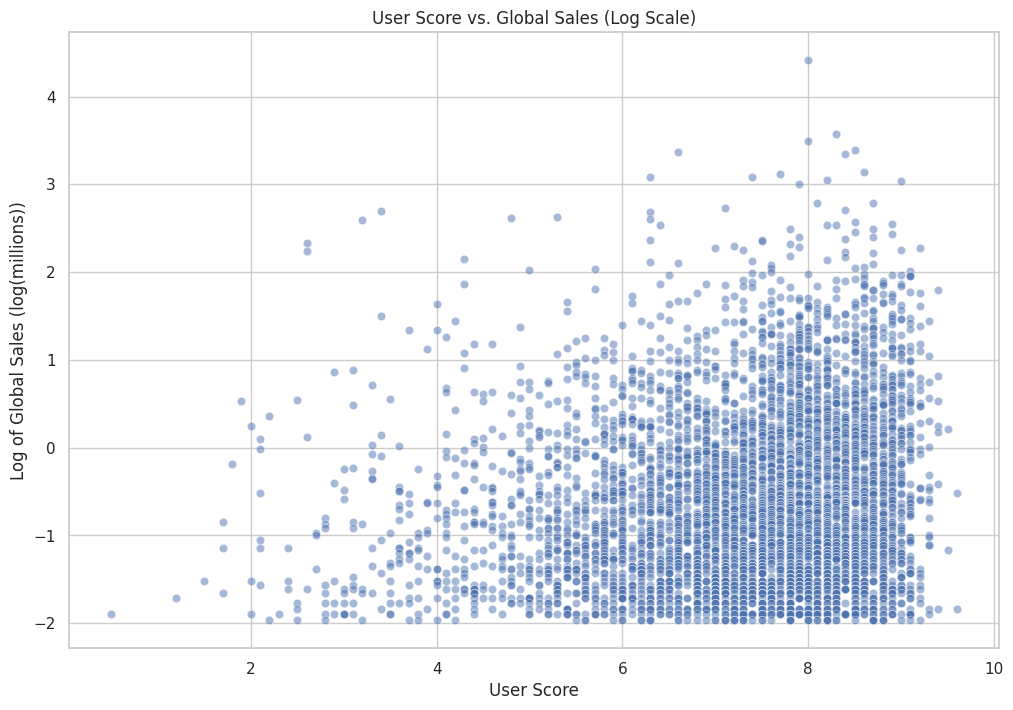

In [ ]:
#4. Scatter Plot of User Score vs. Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='User_Score', y='Global_Sales', data=train_games_df)
plt.title('User Score vs. Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (Millions)')
plt.show()


plt.figure(figsize=(12, 8))
# Applying log transformation to 'Global_Sales' and adding a small constant to avoid log(0)
train_games_df['log_Global_Sales'] = np.log(train_games_df['Global_Sales'] + 0.01)

# Creating a scatter plot with jitter and transparency
sns.scatterplot(x='User_Score', y='log_Global_Sales', data=train_games_df, alpha=0.5)

plt.title('User Score vs. Global Sales (Log Scale)')
plt.xlabel('User Score')
plt.ylabel('Log of Global Sales (log(millions))')
plt.grid(True)
plt.show()

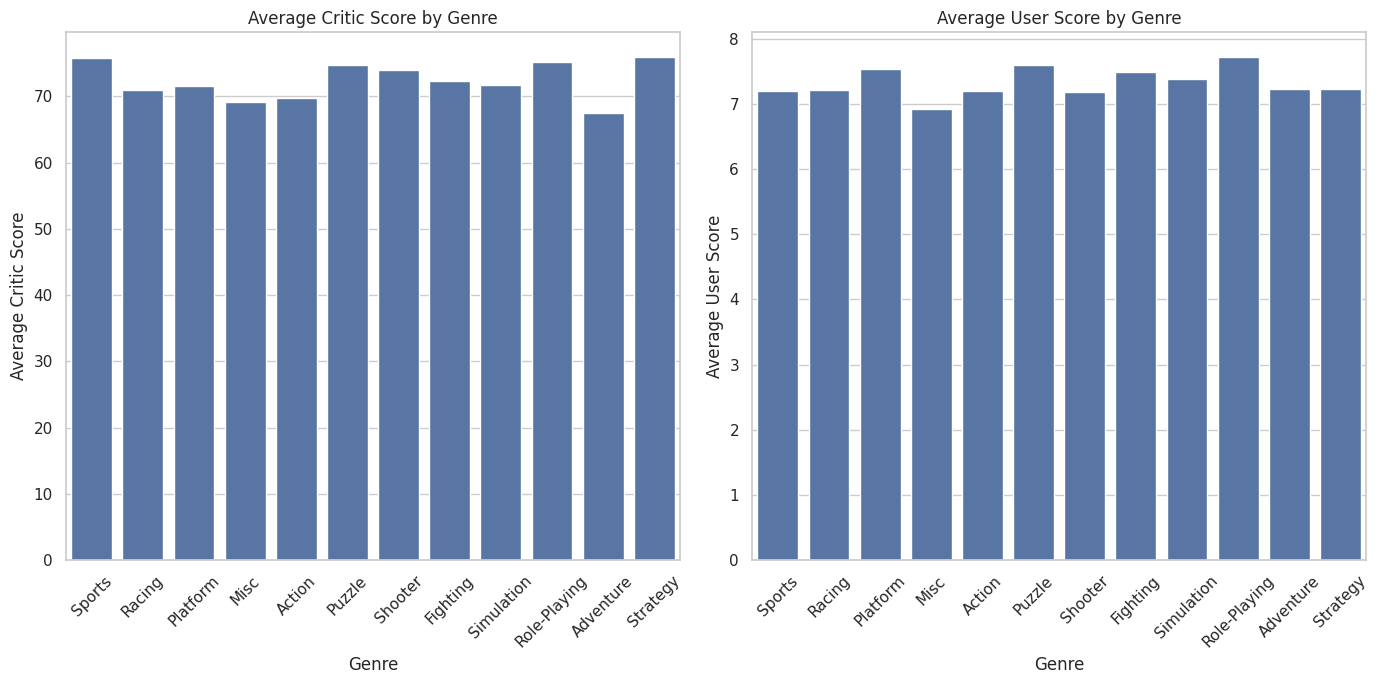

In [ ]:
#5. Average Critic and User Scores by Genre
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Genre', y='Critic_Score', data=train_games_df, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Critic Score by Genre')
plt.ylabel('Average Critic Score')
plt.xlabel('Genre')

plt.subplot(1, 2, 2)
sns.barplot(x='Genre', y='User_Score', data=train_games_df, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average User Score by Genre')
plt.ylabel('Average User Score')
plt.xlabel('Genre')

plt.tight_layout()
plt.show()


<ipython-input-18-8785acecad9b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=train_games_df, estimator=sum, ci=None)


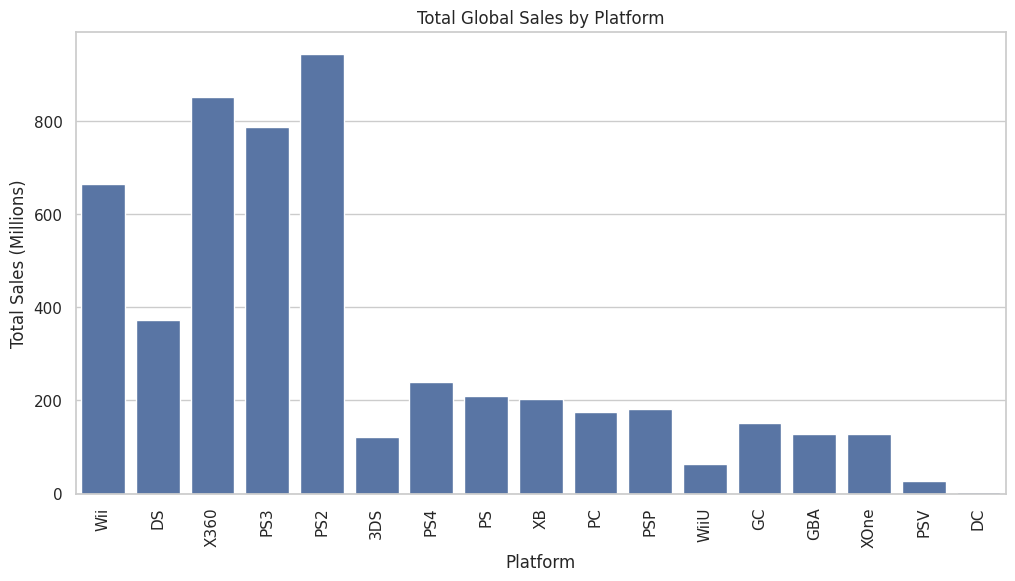

In [ ]:
#6. Sales by Platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=train_games_df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.show()


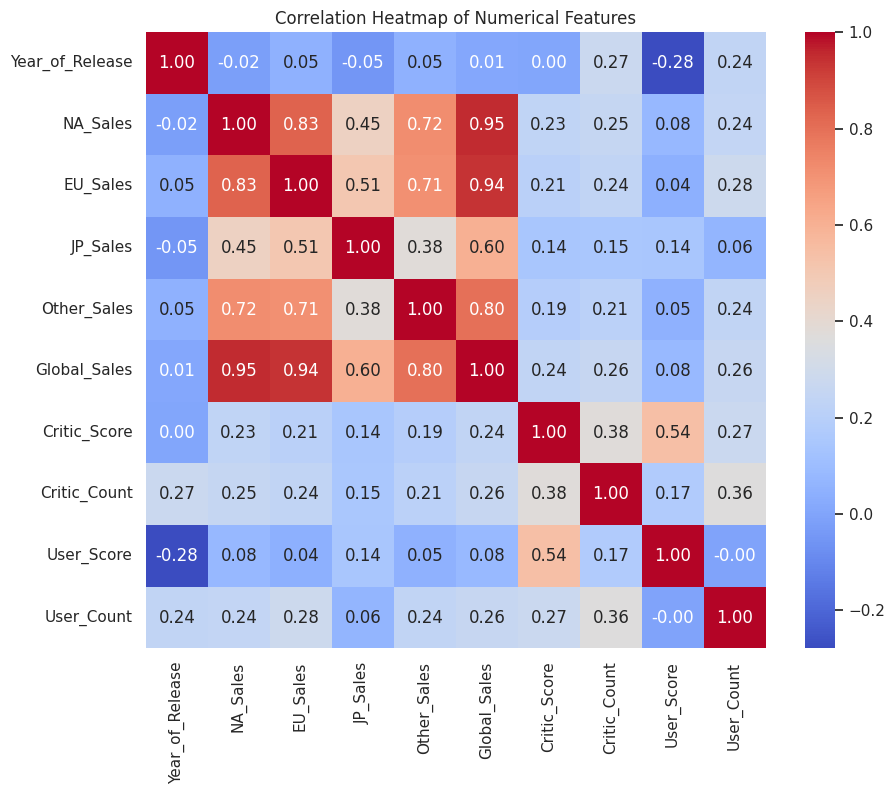

In [ ]:
#7. Correlation Heatmap
#A correlation heatmap will help identify how strongly different numerical variables are related to each other, such as sales across different regions and scores.
# Selecting numerical columns for correlation
numerical_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Calculating correlation matrix
corr_matrix = train_games_df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


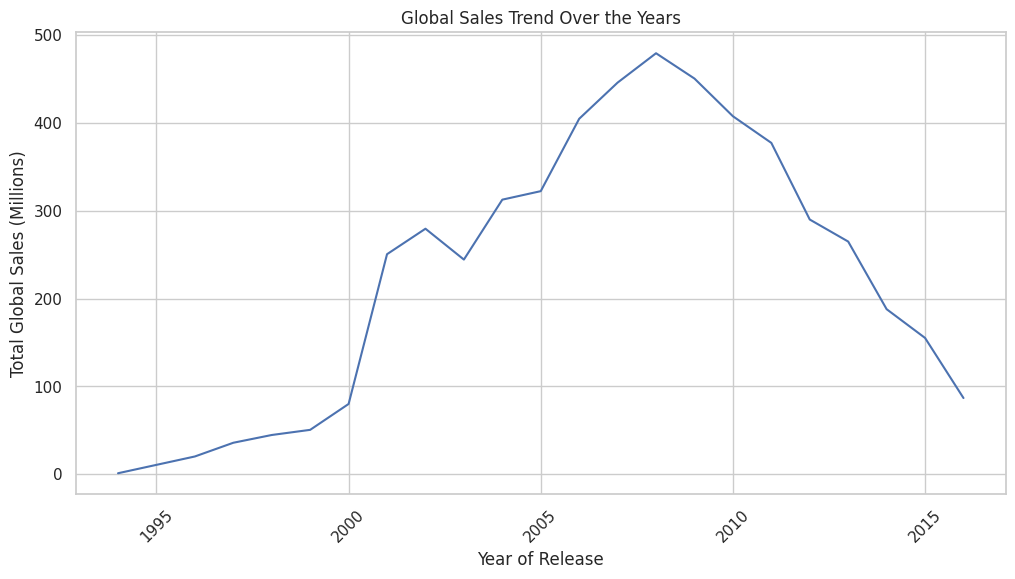

In [ ]:
#8.Sales Trends Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=train_games_df, estimator=sum,errorbar=None )
plt.title('Global Sales Trend Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


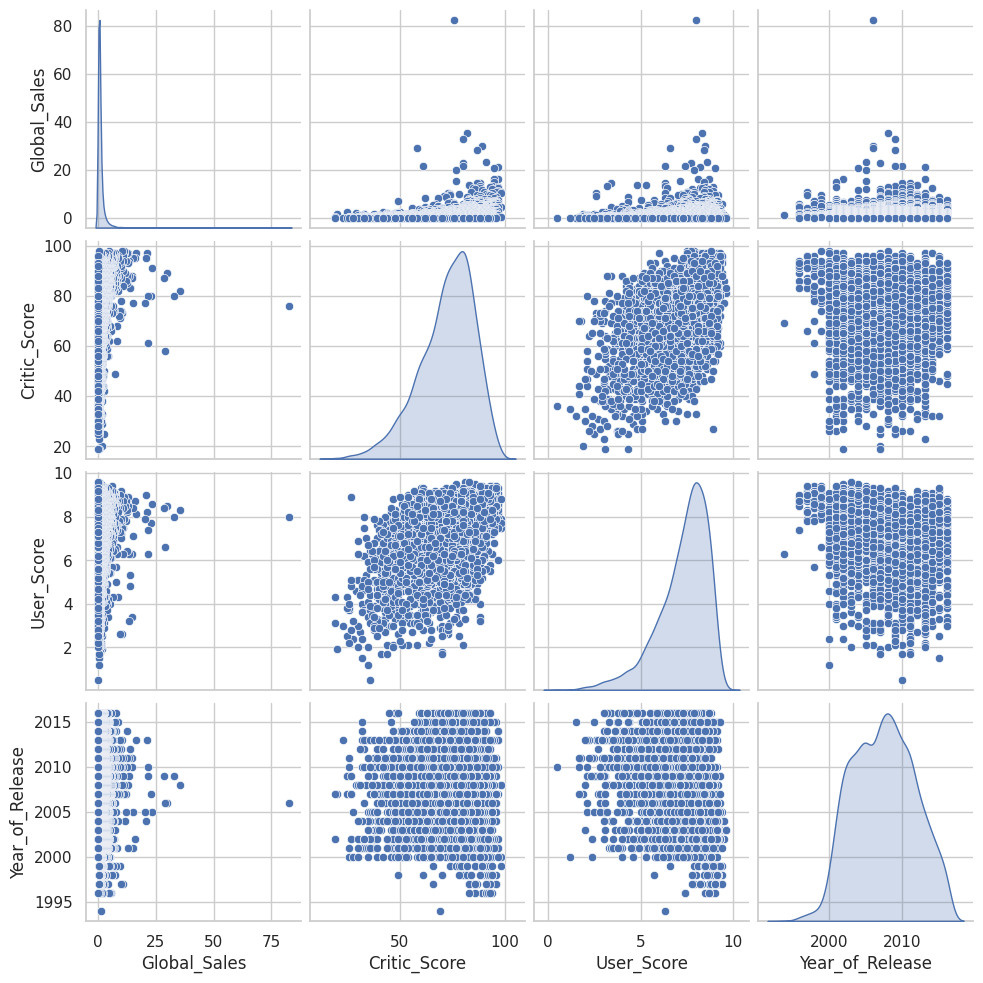

In [ ]:
#A pair plot can help you quickly visualize distributions and relationships between several numerical variables simultaneously. It's especially useful for spotting trends, correlations, and potential outliers across multiple dimensions.
# Selecting a subset of numerical columns for the pair plot to keep it readable
subset_columns = ['Global_Sales', 'Critic_Score', 'User_Score', 'Year_of_Release']
sns.pairplot(train_games_df[subset_columns].dropna(), diag_kind='kde')
plt.show()


In [ ]:
#Selected Random Variables
# User Score: Reflects the game's reception by players.
# Critic Score: Indicates the critical reception and professional reviews.
# Global Sales: Measures commercial success.
# Year of Release: Can help analyze trends over time.
# Genre: This categorical variable can show how different types of games perform.

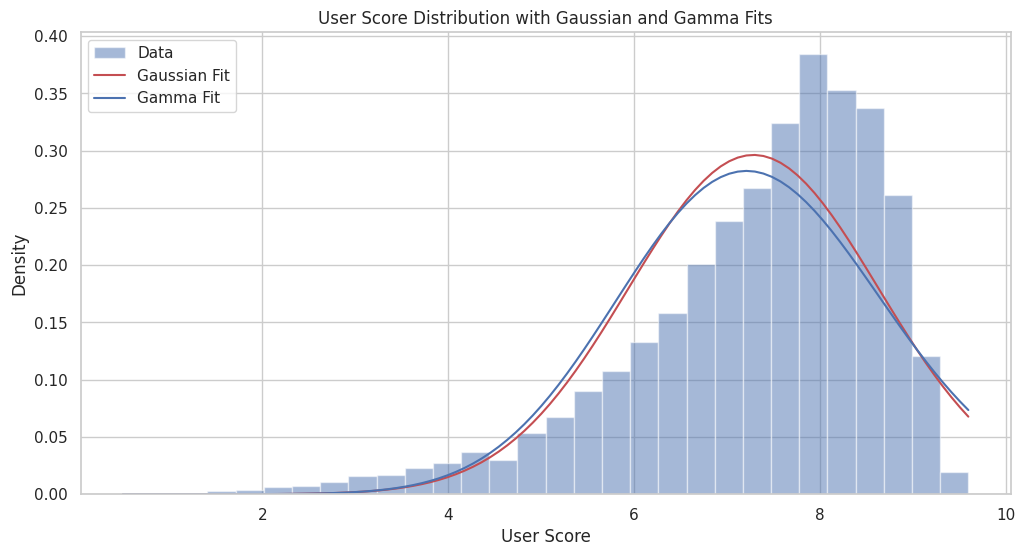

In [ ]:
# 1. User Score and Critic Score
# These are typically ratings on a scale, and we'll explore Gaussian and Gamma distributions for these scores.
# Gaussian Fit
from scipy.stats import norm, gamma, lognorm, poisson

user_score_mean, user_score_std = norm.fit(train_games_df['User_Score'].dropna())
x = np.linspace(train_games_df['User_Score'].min(), train_games_df['User_Score'].max(), 100)
pdf_gaussian = norm.pdf(x, user_score_mean, user_score_std)

# Gamma Fit
user_score_shape, user_score_loc, user_score_scale = gamma.fit(train_games_df['User_Score'].dropna())
pdf_gamma = gamma.pdf(x, user_score_shape, loc=user_score_loc, scale=user_score_scale)

# Plotting both fits
plt.figure(figsize=(12, 6))
plt.hist(train_games_df['User_Score'].dropna(), bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf_gaussian, 'r-', label='Gaussian Fit')
plt.plot(x, pdf_gamma, 'b-', label='Gamma Fit')
plt.title('User Score Distribution with Gaussian and Gamma Fits')
plt.xlabel('User Score')
plt.ylabel('Density')
plt.legend()
plt.show()


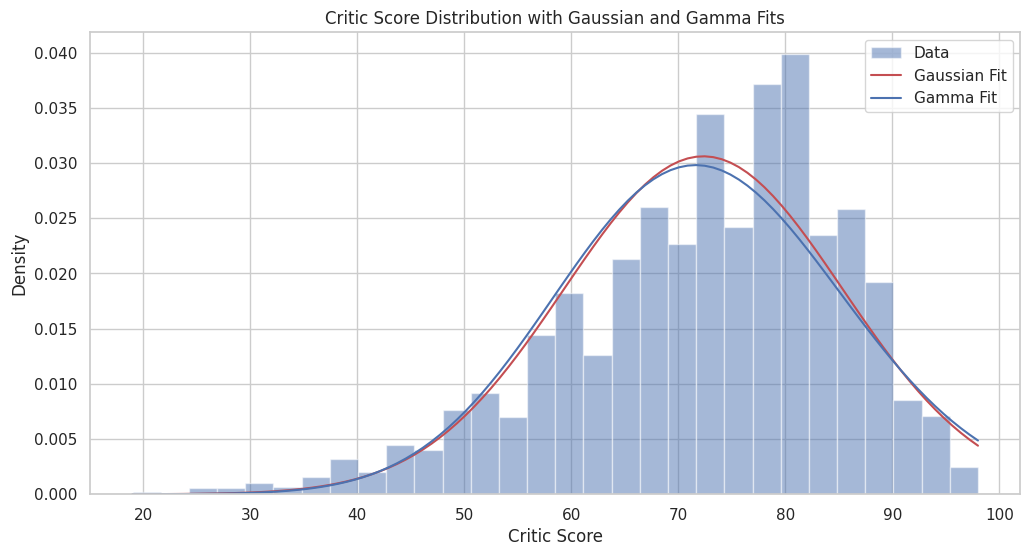

In [ ]:
#2Critic Score
# Gaussian Fit
critic_score_mean, critic_score_std = norm.fit(train_games_df['Critic_Score'].dropna())
x_critic = np.linspace(train_games_df['Critic_Score'].min(), train_games_df['Critic_Score'].max(), 100)
pdf_critic_gaussian = norm.pdf(x_critic, critic_score_mean, critic_score_std)

# Gamma Fit
critic_score_shape, critic_score_loc, critic_score_scale = gamma.fit(train_games_df['Critic_Score'].dropna())
pdf_critic_gamma = gamma.pdf(x_critic, critic_score_shape, loc=critic_score_loc, scale=critic_score_scale)

# Plotting both fits
plt.figure(figsize=(12, 6))
plt.hist(train_games_df['Critic_Score'].dropna(), bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x_critic, pdf_critic_gaussian, 'r-', label='Gaussian Fit')
plt.plot(x_critic, pdf_critic_gamma, 'b-', label='Gamma Fit')
plt.title('Critic Score Distribution with Gaussian and Gamma Fits')
plt.xlabel('Critic Score')
plt.ylabel('Density')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


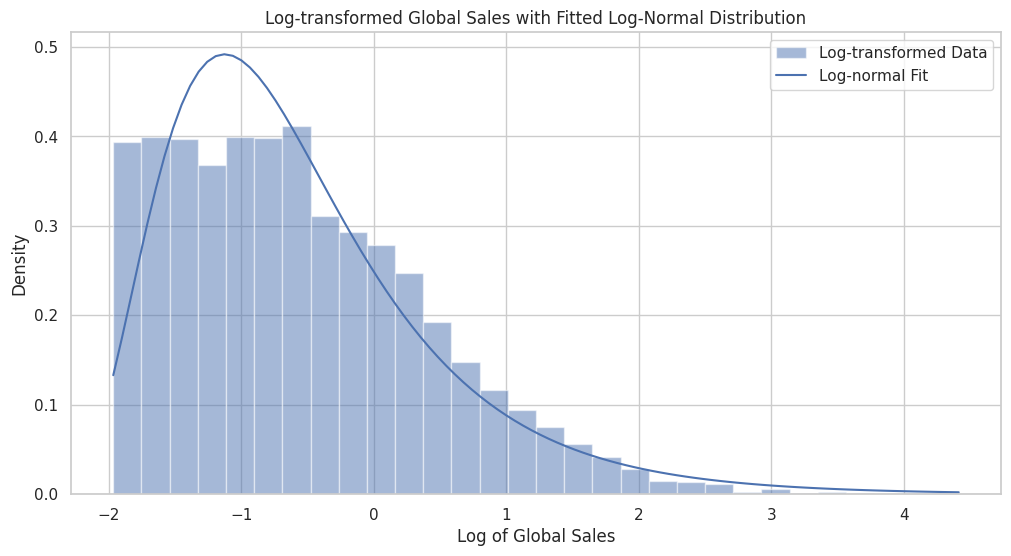

In [ ]:
#3 Global Sales
# Log-normal Fit
sales_data_log = np.log(train_games_df['Global_Sales'] + 0.01)  # Log-transform
sales_shape, sales_loc, sales_scale = lognorm.fit(sales_data_log)
x_sales = np.linspace(min(sales_data_log), max(sales_data_log), 100)
pdf_sales_lognorm = lognorm.pdf(x_sales, sales_shape, loc=sales_loc, scale=sales_scale)

# Plotting the fit
plt.figure(figsize=(12, 6))
plt.hist(sales_data_log, bins=30, density=True, alpha=0.5, label='Log-transformed Data')
plt.plot(x_sales, pdf_sales_lognorm, 'b-', label='Log-normal Fit')
plt.title('Log-transformed Global Sales with Fitted Log-Normal Distribution')
plt.xlabel('Log of Global Sales')
plt.ylabel('Density')
plt.legend()
plt.show()



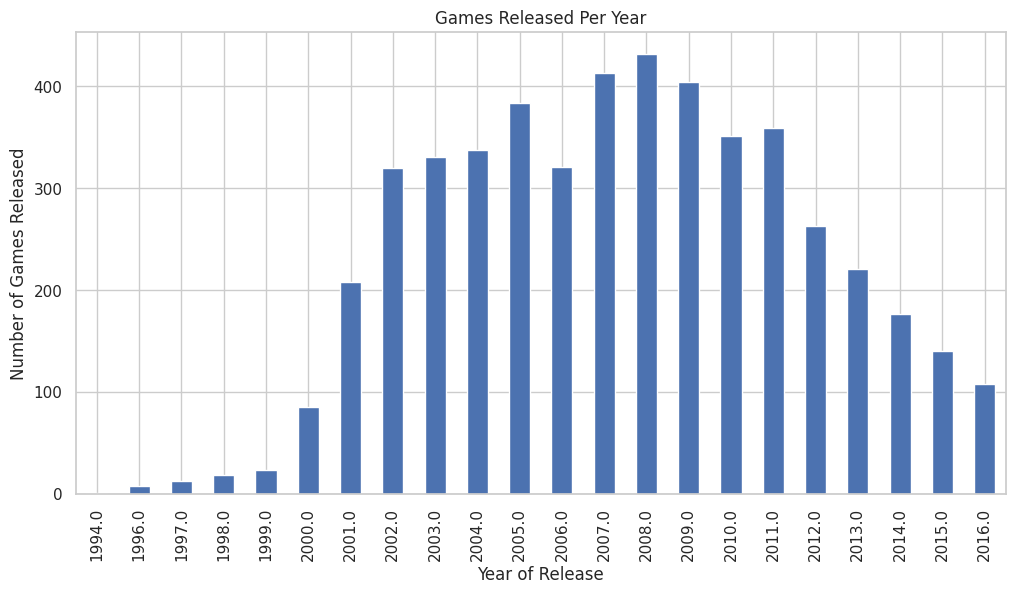

In [ ]:
#4. Year of Release
from scipy.stats import poisson

# Frequency of games released per year
year_counts = train_games_df['Year_of_Release'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()




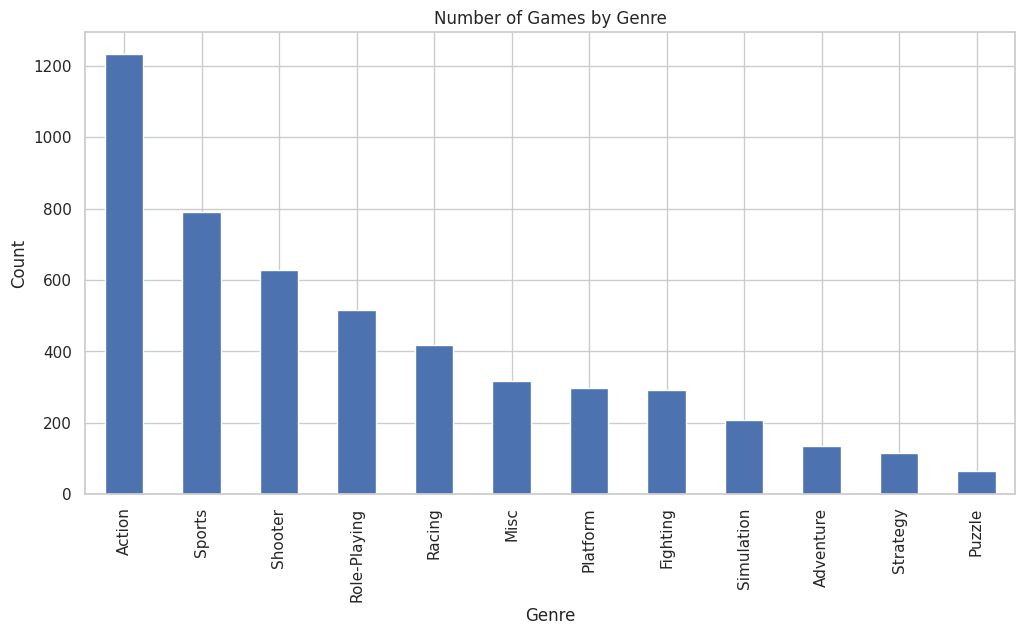

In [ ]:
#5. Genre
# Count the occurrences of each genre and plot
genre_counts = train_games_df['Genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



In [ ]:
#Hypothesis Formulation:
# Let's create hypotheses around the influence of user and critic scores on game sales, and another set based on game genre.

# Hypothesis 1: Impact of User Score on Global Sales
# Null Hypothesis (H0): User scores have no effect on global sales of video games.
# Alternative Hypothesis (H1): Higher user scores positively affect global sales of video games.
# Hypothesis 2: Impact of Critic Score on Global Sales
# Null Hypothesis (H0): Critic scores have no effect on global sales of video games.
# Alternative Hypothesis (H1): Higher critic scores positively affect global sales of video games.
# Hypothesis 3: Relationship between critic scores and user scores for video games
# Null Hypothesis (H0): There is no significant difference between the average critic scores and average user
#scores for video games.
# Alternative Hypothesis (H1): There is a significant difference between the average critic scores and
#average user scores for video games.
# For Hypotheses 1 and 2, where the focus is on whether higher scores lead to higher sales,
#a correlation analysis followed by regression can be used to test the hypotheses. For Hypothesis 3,
#After standardizing the scores, we can then perform a paired sample t-test to compare the means of the
#standardized scores.

In [ ]:
#Conducting the Tests:
# Test for Hypothesis 1 and 2 (User and Critic Scores):
# We'll use a simple linear regression model to test these hypotheses:
import statsmodels.api as sm

# User Score vs Global Sales
X = sm.add_constant(train_games_df['User_Score'].dropna())  # Adding a constant for the intercept
Y = train_games_df.loc[train_games_df['User_Score'].notna(), 'Global_Sales']
model_user = sm.OLS(Y, X).fit()
print(model_user.summary())



                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     33.14
Date:                Sat, 04 May 2024   Prob (F-statistic):           9.10e-09
Time:                        04:16:52   Log-Likelihood:                -11123.
No. Observations:                5011   AIC:                         2.225e+04
Df Residuals:                    5009   BIC:                         2.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0676      0.173      0.390      0.6

In [ ]:
# Critic Score vs Global Sales
X = sm.add_constant(train_games_df['Critic_Score'].dropna())  # Adding a constant for the intercept
Y = train_games_df.loc[train_games_df['Critic_Score'].notna(), 'Global_Sales']
model_critic = sm.OLS(Y, X).fit()
print(model_critic.summary())


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     297.8
Date:                Sat, 04 May 2024   Prob (F-statistic):           7.22e-65
Time:                        04:16:53   Log-Likelihood:                -10995.
No. Observations:                5011   AIC:                         2.199e+04
Df Residuals:                    5009   BIC:                         2.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8908      0.173    -10.926   

In [ ]:
#Critic scores vs user scores
from scipy.stats import ttest_rel
from sklearn.preprocessing import StandardScaler

# Selecting data
critic_scores = train_games_df['Critic_Score'].dropna()
user_scores = train_games_df['User_Score'].dropna()

# Standardizing scores
scaler = StandardScaler()
critic_scores_standardized = scaler.fit_transform(critic_scores.values.reshape(-1, 1))
user_scores_standardized = scaler.transform(user_scores.values.reshape(-1, 1))

# Performing paired-sample t-test
t_statistic, p_value = ttest_rel(critic_scores_standardized, user_scores_standardized)

print("Revised Paired-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Revised Paired-sample t-test results:
T-statistic: [372.7711736]
P-value: [0.]


In [ ]:
#LINEAR REGRESSIONN MODEL


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define target variables
target_variables = ['Global_Sales', 'User_Score', 'Critic_Score', 'Rating']
features = ['Platform','Genre', 'Publisher','Developer']

X = train_games_df[features]
y = train_games_df[target_variables]




# Define a mapping from non-numeric ratings to numeric values
rating_mapping = {'E': 0, 'T': 1, 'M': 2, 'E10+': 3, 'RP': 4}

# Map non-numeric ratings to numeric values
train_games_df['Rating'] = train_games_df['Rating'].map(rating_mapping)












<ipython-input-32-1a85ecd8584c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['Rating'] = train_games_df['Rating'].map(rating_mapping)


In [ ]:
# Check for NaN values in y
train_games_df.dropna(subset=['Rating'], inplace=True)

print(train_games_df['Rating'].isnull().sum())


0


<ipython-input-33-9beb572715ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df.dropna(subset=['Rating'], inplace=True)


In [ ]:
from sklearn.metrics import r2_score
X_train = train_games_df[features]
y_train = train_games_df['Global_Sales']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features]
X_test_encoded = pd.get_dummies(X_test)
y_globalsales_pred = model.predict(X_test_encoded)
print("y_globalsales_train_pred_df",y_globalsales_pred)
mse = mean_squared_error(y_train, y_globalsales_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_globalsales_pred)
print("R-squared value on training data:", abs(r2_train))




y_globalsales_train_pred_df [ 8.875   8.8125  8.875  ...  0.4375 -0.5625  1.125 ]
Mean Squared Error: 5.118285724488774
Root mean Sqaured Error 2.2623628631341997
R-squared value on training data: 0.020671945188972307


In [ ]:
X_train = train_games_df[features]
y_train = train_games_df['Critic_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features]
X_test_encoded = pd.get_dummies(X_test)
y_criticscore_pred = model.predict(X_test_encoded)
print("y_criticscore_train_pred_df",y_criticscore_pred)
mse = mean_squared_error(y_train, y_criticscore_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_criticscore_pred)
print("R-squared value on training data:", abs(r2_train))


y_criticscore_train_pred_df [79.8046875 76.3203125 79.8046875 ... 50.3359375 75.9609375 73.28125  ]
Mean Squared Error: 67.08003975165397
Root mean Sqaured Error 8.190240518547302
R-squared value on training data: 0.6044880753459804


In [ ]:
X_train = train_games_df[features]
y_train = train_games_df['User_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features]
X_test_encoded = pd.get_dummies(X_test)
y_userscore_pred = model.predict(X_test_encoded)
print("y_userscore_train_pred_df",y_userscore_pred)
mse = mean_squared_error(y_train, y_userscore_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_userscore_pred)
print("R-squared value on training data:", abs(r2_train))

y_userscore_train_pred_df [7.875      7.84667969 7.875      ... 5.59472656 8.19140625 7.97851562]
Mean Squared Error: 0.887036375139079
Root mean Sqaured Error 0.9418260853995705
R-squared value on training data: 0.5104115257996914


In [ ]:
X_train = train_games_df[features]
y_train = train_games_df['Rating']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features]
X_test_encoded = pd.get_dummies(X_test)
y_ratings_pred = model.predict(X_test_encoded)
print("y_ratings_train_pred_df",y_ratings_pred)
mse = mean_squared_error(y_train, y_ratings_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_ratings_pred)
print("R-squared value on training data:", abs(r2_train))

y_ratings_train_pred_df [0.09472656 0.48535156 0.09472656 ... 1.07519531 1.         0.16308594]
Mean Squared Error: 0.46808587806934154
Root mean Sqaured Error 0.684168018888154
R-squared value on training data: 0.5521933119969726


In [ ]:
#We have done some feature engineering so we have notice that these all ouput factors such as critic score , user score , globl sales,rating are mostly dependent on developers

In [ ]:
from sklearn.metrics import r2_score
features1 = ['Platform','Genre', 'Publisher']

X_train = train_games_df[features1]
y_train = train_games_df['Global_Sales']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features1]
X_test_encoded = pd.get_dummies(X_test)
y_globalsales_prednew = model.predict(X_test_encoded)
print("y_globalsales_train_prednew_df",y_globalsales_prednew)
mse = mean_squared_error(y_train, y_globalsales_prednew)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_globalsales_prednew)
print("R-squared value on training data:", abs(r2_train))


y_globalsales_train_prednew_df [ 4.078125  4.265625  4.078125 ...  1.25     -0.671875 -0.5625  ]
Mean Squared Error: 4.599142564106981
Root mean Sqaured Error 2.1445611588637385
R-squared value on training data: 0.08285390074088927


In [ ]:
X_train = train_games_df[features1]
y_train = train_games_df['Critic_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features1]
X_test_encoded = pd.get_dummies(X_test)
y_criticscore_pred = model.predict(X_test_encoded)
print("y_criticscore_train_pred_df",y_criticscore_pred)
mse = mean_squared_error(y_train, y_criticscore_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_criticscore_pred)
print("R-squared value on training data:", abs(r2_train))

y_criticscore_train_pred_df [75.9375  72.9375  75.9375  ... 74.28125 75.15625 72.25   ]
Mean Squared Error: 131.21125917044657
Root mean Sqaured Error 11.4547483241862
R-squared value on training data: 0.22636274750416896


In [ ]:
X_train = train_games_df[features1]
y_train = train_games_df['User_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features1]
X_test_encoded = pd.get_dummies(X_test)
y_userscore_pred = model.predict(X_test_encoded)
print("y_userscore_train_pred_df",y_userscore_pred)
mse = mean_squared_error(y_train, y_userscore_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_userscore_pred)
print("R-squared value on training data:", abs(r2_train))

y_userscore_train_pred_df [7.72949219 7.73535156 7.72949219 ... 6.49804688 7.94628906 7.52832031]
Mean Squared Error: 1.444892774633914
Root mean Sqaured Error 1.2020369273170912
R-squared value on training data: 0.2025097631366536


In [ ]:
X_train = train_games_df[features1]
y_train = train_games_df['Rating']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encoded = pd.get_dummies(X_train)

    # Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

    #Making predictions on the training data itself and calculatiing the mse

X_test = train_games_df[features1]
X_test_encoded = pd.get_dummies(X_test)
y_ratings_pred = model.predict(X_test_encoded)
print("y_ratings_train_pred_df",y_ratings_pred)
mse = mean_squared_error(y_train, y_ratings_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_train, y_ratings_pred)
print("R-squared value on training data:", abs(r2_train))

y_ratings_train_pred_df [0.12207031 0.58691406 0.12207031 ... 0.64746094 0.44238281 1.16015625]
Mean Squared Error: 0.699347265835466
Root mean Sqaured Error 0.8362698522818254
R-squared value on training data: 0.33095101230257606


In [ ]:
#Random Forest Classifier model




from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define target variables
target_variablesR = ['Global_Sales', 'User_Score', 'Critic_Score', 'Rating']
featuresR = ['Platform','Genre', 'Publisher','Developer']

X = train_games_df[featuresR]
y = train_games_df[target_variablesR]




# Define a mapping from non-numeric ratings to numeric values
rating_mappingR = {'E': 0, 'T': 1, 'M': 2, 'E10+': 3, 'RP': 4}

# Map non-numeric ratings to numeric values
train_games_df['Rating'] = train_games_df['Rating'].map(rating_mappingR)

<ipython-input-44-0dacc18f9563>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_games_df['Rating'] = train_games_df['Rating'].map(rating_mappingR)


In [ ]:
from sklearn.metrics import r2_score
X_trainR = train_games_df[featuresR]
y_trainR = train_games_df['Global_Sales']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encodedR = pd.get_dummies(X_trainR)

    # Train Linear Regression model
model = RandomForestRegressor()
model.fit(X_train_encodedR, y_trainR)

    #Making predictions on the training data itself and calculatiing the mse

X_testR = train_games_df[featuresR]
X_test_encodedR = pd.get_dummies(X_testR)
y_globalsales_predR = model.predict(X_test_encodedR)
print("y_globalsales_train_pred_Rdf",y_globalsales_predR)
mse = mean_squared_error(y_trainR, y_globalsales_predR)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_trainR, y_globalsales_predR)
print("R-squared value on training data:", abs(r2_train))


y_globalsales_train_pred_Rdf [36.55008425 22.46799238 36.55008425 ...  0.17411667  0.18733333
  0.14305333]
Mean Squared Error: 1.2831418270557513
Root mean Sqaured Error 1.13275850341357
R-squared value on training data: 0.7441200169212636


In [ ]:
X_trainR = train_games_df[featuresR]
y_trainR = train_games_df['Critic_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encodedR = pd.get_dummies(X_trainR)

    # Train Linear Regression model
model = RandomForestRegressor()
model.fit(X_train_encodedR, y_trainR)

    #Making predictions on the training data itself and calculatiing the mse

X_testR = train_games_df[featuresR]
X_test_encodedR = pd.get_dummies(X_testR)
y_criticscore_predR = model.predict(X_test_encodedR)
print("y_criticscore_train_pred_df",y_criticscore_predR)
mse = mean_squared_error(y_trainR, y_criticscore_predR)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_trainR, y_criticscore_predR)
print("R-squared value on training data:", abs(r2_train))

y_criticscore_train_pred_df [78.87007359 80.80742857 78.87007359 ... 51.40416667 75.72333333
 66.11533333]
Mean Squared Error: 28.500298267838055
Root mean Sqaured Error 5.338567061285084
R-squared value on training data: 0.8319588380856868


In [ ]:
X_trainR = train_games_df[featuresR]
y_trainR = train_games_df['User_Score']

    # Encode categorical variables if needed (e.g., using pd.get_dummies)
X_train_encodedR = pd.get_dummies(X_trainR)

    # Train Linear Regression model
model = RandomForestRegressor()
model.fit(X_train_encodedR, y_trainR)

    #Making predictions on the training data itself and calculatiing the mse

X_testR = train_games_df[featuresR]
X_test_encodedR = pd.get_dummies(X_testR)
y_userscore_predR = model.predict(X_test_encodedR)
print("y_userscore_train_pred_Rdf",y_userscore_predR)
mse = mean_squared_error(y_trainR, y_userscore_predR)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean Sqaured Error",rmse)
r2_train = r2_score(y_trainR, y_userscore_predR)
print("R-squared value on training data:", abs(r2_train))

y_userscore_train_pred_Rdf [7.79228214 8.3672619  7.79228214 ... 5.42783333 8.325      7.86973333]
Mean Squared Error: 0.43902908364510607
Root mean Sqaured Error 0.6625926981525725
R-squared value on training data: 0.7576834668615862
